In [1]:
import janitor  # noqa: F401
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib_inline.backend_inline import set_matplotlib_formats
import cartopy.crs as ccrs

import deepwaters  # noqa: F401
from deepwaters.regions import basins
from deepwaters.utils import ROOT_DIR

In [ ]:
set_matplotlib_formats("retina")
plt.style.use(ROOT_DIR / "config/style_paper.mplstyle")
FIGURE_DIR = ROOT_DIR / "docs/figures/si"

In [3]:
df_basins = basins()

In [4]:
THOLD = 2e5

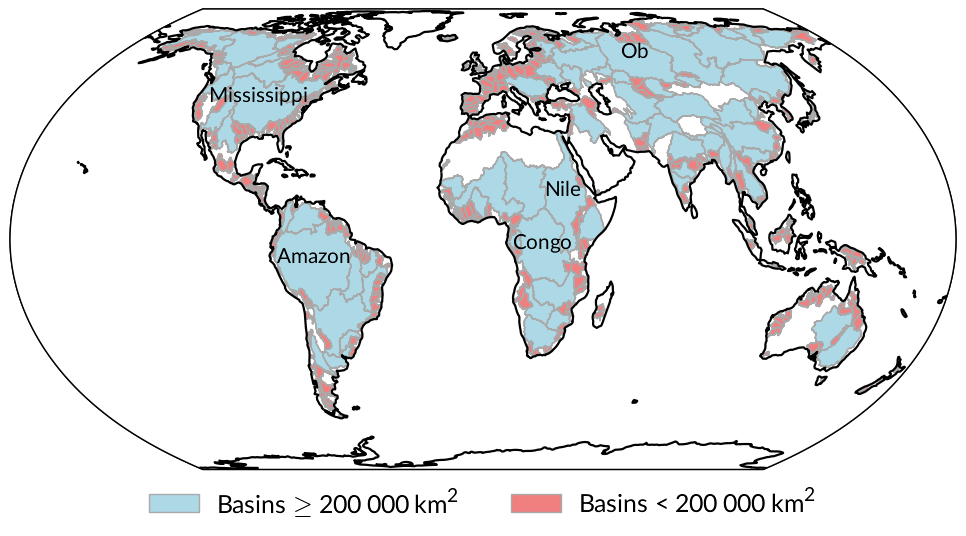

In [5]:
smallb = df_basins.loc[df_basins.sum_sub_ar < THOLD]

# Color arguments to pass to plot routine
all_kwargs = dict(
    edgecolor="darkgrey", linewidth=0.5, facecolor="lightblue", rasterized=True
)
small_kwargs = dict(
    edgecolor="darkgrey", linewidth=0.5, facecolor="lightcoral", rasterized=True
)

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": ccrs.EqualEarth()})
# Plot all basins
ax = df_basins.dw.projplot(**all_kwargs)
# Plot basins under size threshhold
smallb.dw.projplot(ax=ax, coastlines=True, **small_kwargs)

# Create legend with proxy artists

big_patch = mpatches.Patch(
    **all_kwargs, label=r"Basins $\ge$ \qty{200000}{\km\squared}"
)
small_patch = mpatches.Patch(
    **small_kwargs, label=r"Basins $<$ \qty{200000}{\km\squared}"
)

ax.legend(
    loc="lower center",
    handles=[big_patch, small_patch],
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
)

# Label the basins
top5 = basins(top=5)
top5["coords"] = top5["geometry"].apply(lambda x: x.centroid.coords[0])
for idx, row in top5.iterrows():
    ax.annotate(
        text=row["river"],
        xy=row["coords"],
        horizontalalignment="center",
        transform=ccrs.PlateCarree(),
        size="small",
    )

fig.savefig(FIGURE_DIR / "basins_map_named.pdf", backend="pgf")